# Introduction

This competition is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

This notebook will aim to provide some interactive charts and analysis of the competition data by the way of the Python visualization library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Ploy.ly is one of the main products offered by the SW company - Plotly which specializes in providing online graphical and statistical visualizations(charts and dashboards) as well as an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc.

Listed below for easy convenience are links to the various Plotly plots in this notebook:

- Simple horizontal bar plot - Used to inspect the Target variable distribution
- Correlation Heatmap plot - Inspect the correlation between the different features
- Scatter plot - Compare the feature importances generated by Random Forest and Gradient-Boosted model
- Vertical bar plot - List in descending order, the importance of the various features
- 3D Scatter plot

The themes in this notebook can be briefly summarized below:

1. Data Quality Checks - Visualizing and evaluating all missing/Null values (values that are -1)
2. Feature inspection and filtering - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.
3. Feature importance ranking via learning models - Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

Let's Go

In [1]:
# Let us load in the relevant Python modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
import seaborn as sns

py.init_notebook_mode(connected=True)
import warnings
from collections import Counter

import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.feature_selection import mutual_info_classif

warnings.filterwarnings("ignore")

Let us load in the training data provided using Pandas:

In [2]:
train = pd.read_csv("../input/train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print(f"The train dataset contains {rows} rows and {columns} columns")

The train dataset contains 595212 rows and 59 columns


# Data Quality checks

**Null or missing values check**

As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:

In [4]:
# any() applied twice to check run the isnull check across all columns
train.isnull().any().any()

False

- Our null values check returns Fall but however, this does not really mean that this case has been closed as the datais also described as "Values of -1 indicate that the feature was missing from the observation". Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [5]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

Next, we can use resident Kaggler's Aleksey Bilogur - creator of the Missingno pacakge which is a most useful and convenient tool in visualizing missing values in the dataset, so, check it out.

<Axes: >

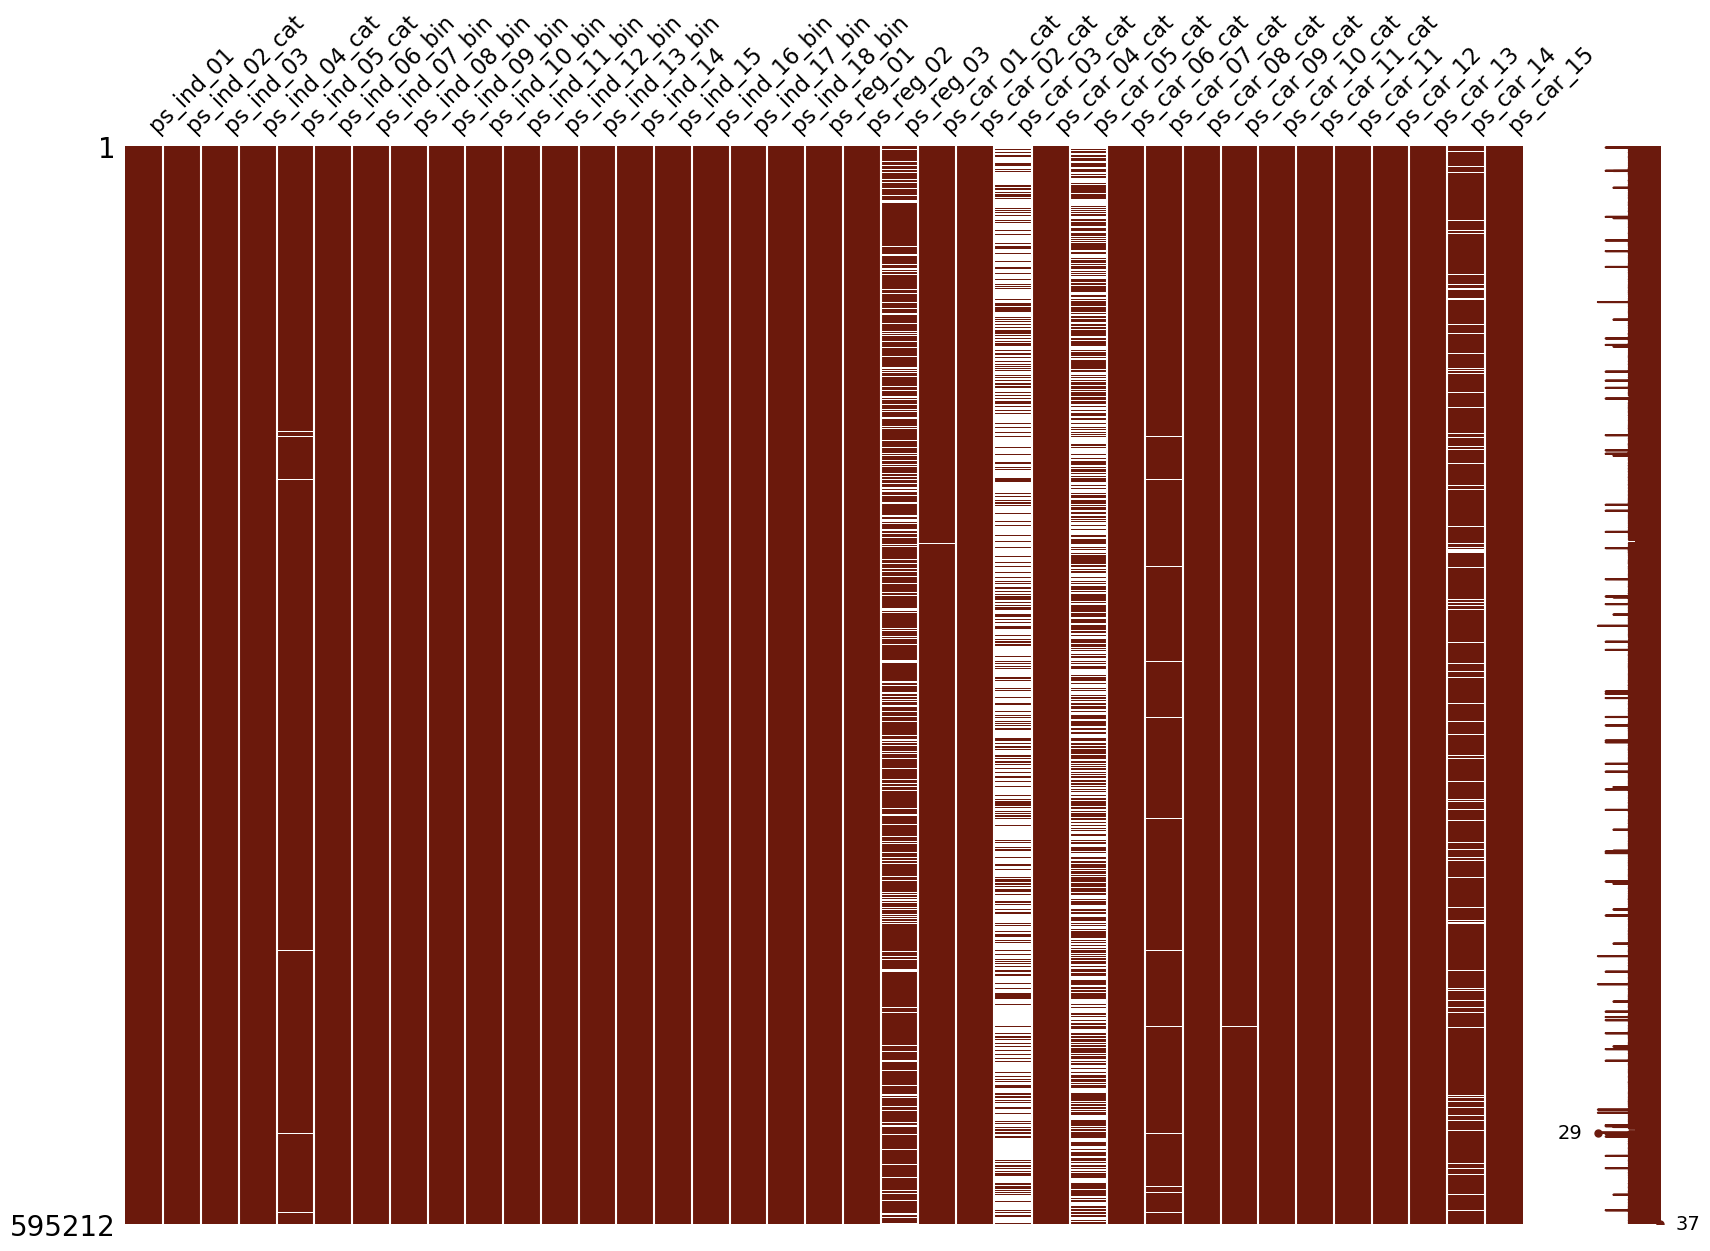

In [6]:
import missingno as msno

# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

As we can see, the missing values now become much more apparent and clear when we visualize it, where the empty white bands(data that is missing) superposed on the vertical dark red bands(non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features(although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here ase follows:

- ps_ind_05_cat
- ps_reg_03
- ps_car_03_cat
- ps_car_05_cat
- ps_car_07_cat
- ps_car_09_cat
- ps_car_14

Most of the missing values occur in the columns suffixed with _cat. One should really take further note of the columns ps_reg_03, ps_car_03_cat and ps_car_05_cat. Evinced from the ratio of white to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

**Target variable inspection**

Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given(in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.

In [7]:
data = [
    go.Bar(
        x=train["target"].value_counts().index.values,
        y=train["target"].value_counts().values,
        text="Distribution of target variable",
    )
]

layout = go.Layout(title="Target variable distribution")

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename="basic-bar")

Hmm, the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite

**Datatype check**

This checkc is carried out to see what kind of datatypes the train set is comprised of: integers of characters or floats just to gain a better overview of the data we were provided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the Collections module as follows:

In [8]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we  can observe from this check, the features/columns consist of only two datatypes - Integer and floats.

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as _bin, _cat and _reg, where they have given use a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values(probably only the continuous features) and integer datatypes(binary, categorical and ordinal features).

In [9]:
train_float = train.select_dtypes(include=["float64"])
train_int = train.select_dtypes(include=["int64"])

# Correlation plots

As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualization package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the world "heatmap".

**Correlation of float features**

<Axes: title={'center': 'Pearson correlation of continuous features'}>

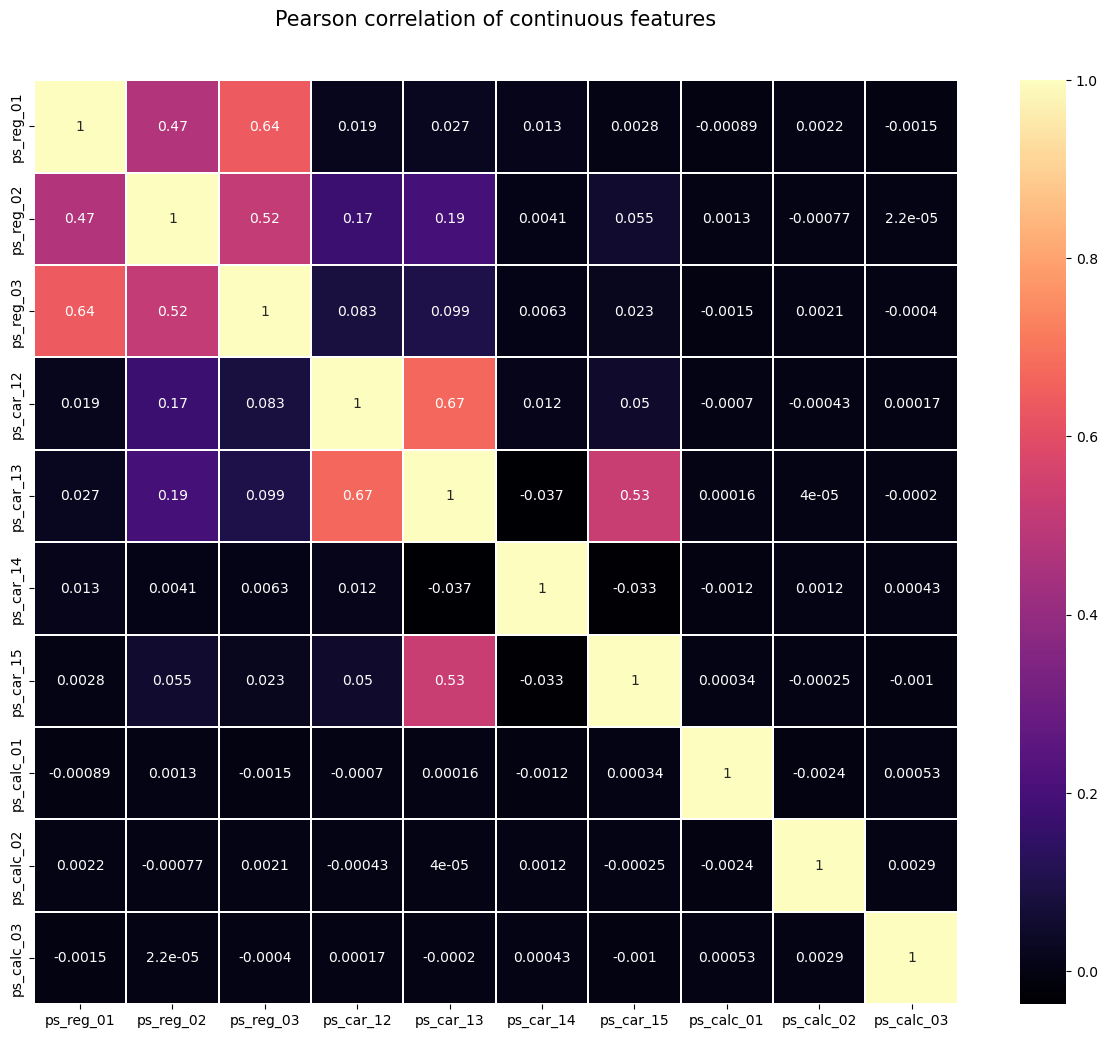

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Pearson correlation of continuous features", y=1.05, size=15)
sns.heatmap(
    train_float.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
)

From the correlation plot, we can see that the majority of the featues display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

- ps_reg_01, ps_reg_03
- ps_reg_02, ps_reg_03
- ps_car_12, ps_car_13
- ps_car_13, ps_car_15

**Correlation of integer features**

For the columns of integer datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation values is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale(other include Portland and Viridis - try it for yourself).

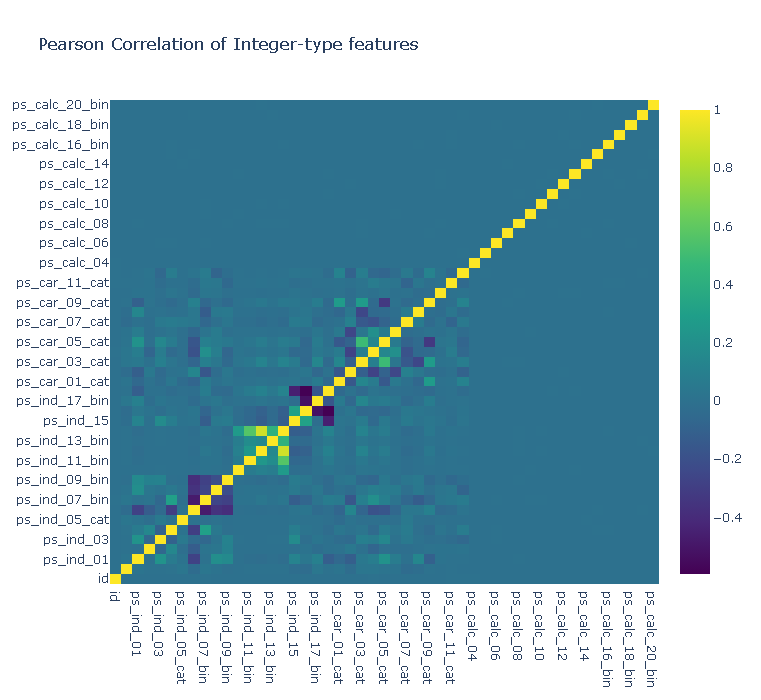

In [13]:
data = [
    go.Heatmap(
        z=train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale="Viridis",
        reversescale=False,
        # text=True,
        opacity=1.0,
    )
]

layout = go.Layout(
    title="Pearson Correlation of Integer-type features",
    xaxis=dict(ticks="", nticks=36),
    yaxis=dict(ticks=""),
    width=900,
    height=700,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="labelled-heatmap")

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis(PCA), this would require a certain degree of correlation. We can note some features of interest are as follows:

Negatively correlated features: ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin

One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on the basis, albeit one that many not really reflect the underlying truth for the data.

# Mutual Information plots

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresponding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual_info_classif method which measures the dependency between two random variables and ranges from zero(where the random variables are independent of each other) to higher values(indicate some dependency). This therefore will help give us an idea of how much information from the target may be contained within the features.

The sklearn implementation of the mutual_info_classif function tells us that it "relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances".

In [15]:
mf = mutual_info_classif(
    train_float.values, train.target.values, n_neighbors=3, random_state=17
)
print(mf)

[0.02599971 0.00767074 0.00617141 0.01855302 0.00158483 0.00338192
 0.01668813 0.0134428  0.01334669 0.01348572]
